In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats

In [111]:
np.random.seed(2)
data = np.random.normal(size=5)
print( np.mean(data), np.std(data), np.min(data), np.max(data))
data = np.random.normal(size=100)
print( np.mean(data), np.std(data), np.min(data), np.max(data))
data = np.random.normal(size=1000)
print( np.mean(data), np.std(data), np.min(data), np.max(data))
data = np.random.normal(size=100, loc=10, scale=3)
print( np.mean(data), np.std(data), np.min(data), np.max(data))

-0.5524771094180257 1.3506244155473879 -2.136196095668454 1.6402708084049886
-0.0706825546064689 1.002676807369357 -2.6594494563834883 2.2922080128149576
-0.0340408914554995 0.995426082195496 -2.519579296368879 4.108692623805201
9.554656871260608 2.7016204800066337 2.456863867006632 15.946490003308888


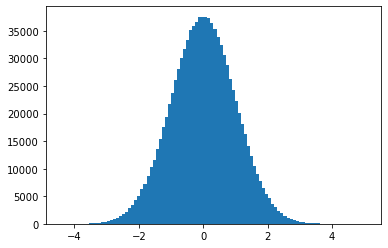

In [118]:
plt.hist(np.random.normal(size=1000000), bins=100)
plt.show()

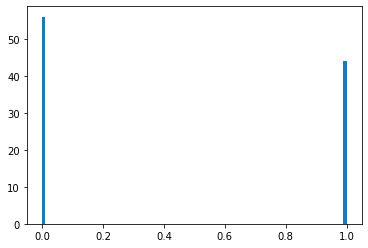

In [189]:
np.random.binomial(1, 0.5, 100)
plt.hist(np.random.binomial(1, 0.5, 100), bins=100) # n, p 확율, s 사이즈
plt.show()

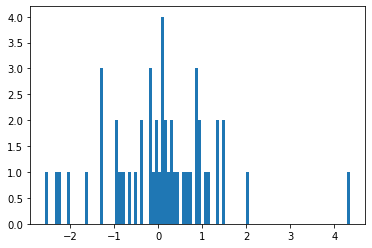

In [188]:
np.random.seed(12345)
plt.hist(np.random.standard_t(10, 50), bins=100) #df=10, size=50
plt.show()


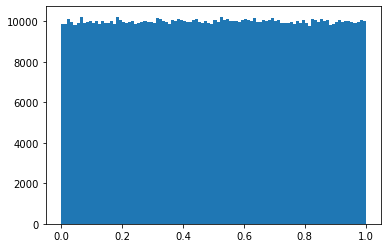

In [187]:
plt.hist(np.random.uniform(size=1000000), bins=100)
plt.show()

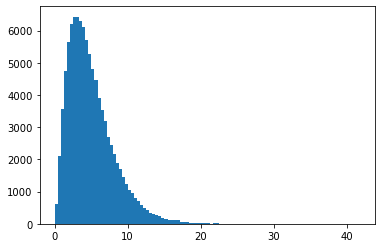

In [186]:
np.random.chisquare(5, 100)
plt.hist(np.random.chisquare(5, 100000), bins=100)
plt.show()

In [195]:
x = [3, 5, 8, 11, 13]
y = [1, 2, 3, 4, 5]
np.corrcoef(x, y)

array([[1.        , 0.99705449],
       [0.99705449, 1.        ]])

In [196]:
#!pip install scikit-learn

  Using cached scikit_learn-0.23.1-cp36-cp36m-win_amd64.whl (6.8 MB)


In [197]:
from sklearn.datasets import load_iris

In [198]:
iris = load_iris()

In [208]:
iris.keys()
iris['feature_names']
iris['target_names']
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [209]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


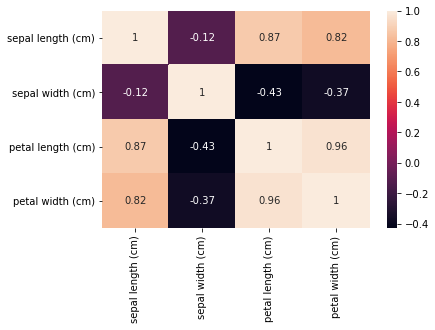

In [214]:
sns.heatmap(iris_df.iloc[:, :4].corr(), annot=True)
plt.show()

In [222]:
# iris_df.iloc[:, [0, 2]].corr() # 4: species는 적합하지 않음
sp.stats.pearsonr(iris_df.iloc[:, 0], iris_df.iloc[:, 2])

(0.8717537758865833, 1.0386674194496954e-47)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats

In [18]:
np.random.seed(42)

N = 10
mu_0 = 0.8

# x = sp.stats.bernoulli(mu_0).rvs(N)
x = [1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
print("승-패 : ", x)

n = np.count_nonzero(x)
print("승리횟수 : [{0}] / 승률 : [{1}]".format(n, n/N) )

p_value = sp.stats.binom_test(n, N)
p_value

승-패 :  [1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
승리횟수 : [8] / 승률 : [0.8]


0.10937500000000003

In [22]:
# obs = np.array([[5, 25], [10, 20]])
obs = np.array([[4, 16, 20], [23, 18, 19]])
print(obs)

chi2, p_value, dof , expected = sp.stats.chi2_contingency(obs)
print(chi2, dof, p_value)

[[ 4 16 20]
 [23 18 19]]
9.910060890453046 2 0.00704786570249751


In [30]:
np.random.seed(0)
N = 10
mu_0 = 0
# x = sp.stats.norm(mu_0).rvs(N)
# sns.distplot(x, kde=False, fit=sp.stats.norm)
# plt.show()

x = np.random.randint(60, 100, 20)

# 표본 x가 평균 0인 모집단에서 추출되었는지 검정
print(x.mean())
# sp.stats.ttest_1samp(x, popmean=0) 
sp.stats.ttest_1samp(x, popmean=73) 

79.9


Ttest_1sampResult(statistic=2.310904547491469, pvalue=0.0322237691966287)

In [43]:
np.random.seed(10)
x1 = np.random.randint(70, 97, 20) # A학원 학생들의 수학 성적
x2 = np.random.randint(65, 90, 20) # B학원 학생들의 수학 성적
print(x1.mean(), x2.mean())
sp.stats.ttest_ind(x1, x2, equal_var=True)

82.2 77.75


Ttest_indResult(statistic=1.8721508702480907, pvalue=0.0688967004131896)

In [51]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

print(x1, x2)
print(x1.mean(), x2.mean())
print(sp.stats.ttest_ind(x1, x2, equal_var=False))
print(sp.stats.ttest_rel(x1, x2))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763] [ 1.79419149 -0.03727524 -0.20429244 -0.64106471  1.24047059]
0.055371240983643745 0.4304059387240594
Ttest_indResult(statistic=-0.5452403591738115, pvalue=0.6005835433641389)
Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)


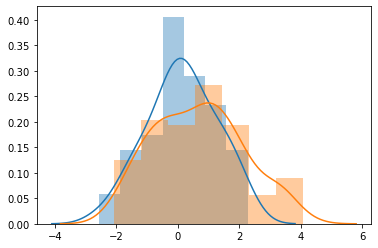

0.14055927231309787 1.125522920554846


KstestResult(statistic=0.23, pvalue=0.05550723364321564)

In [57]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

print(x1.mean(), x1.std())
sp.stats.ks_2samp(x1, x2)